In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath as cm

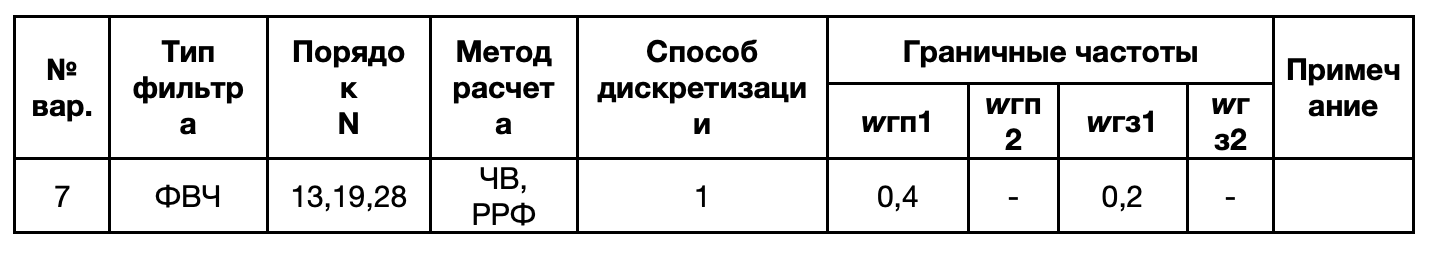

In [2]:
#фвч
N = np.array([13, 19, 28], dtype='int')
#ЧВ и РРФ
diskr = np.int(1) #способ дискретизации
wgp1 = np.float64(0.4)
wgz1 = np.float64(0.1)

In [3]:
def show_plot(x, y):
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.grid()
    plt.show()

In [38]:
def find_A(h, M=50):
    dw = 0.5 / M
    n = len(h)
    out = []
    for k in range(0, M + 1):
        A = 0
        for m in range(n):
            for i in range(n):
                A += h[m] * h[i] * np.cos(2 * np.pi * (m - i) * k * dw)
        out.append(abs(A))
    np.array(out)
    return out - out[-1]

In [39]:
def find_fi(h, M=50):
    dw = 0.5 / M
    out = []
    for k in range(0, M + 1):
        h_c = 0
        h_z = 0
        for i in range(len(h)):
            h_c += h[i] * np.sin(2 * np.pi * i * k * dw)
            h_z += h[i] * np.cos(2 * np.pi * i * k * dw)
        out.append(-np.arctan(h_c/h_z))
    np.array(out)
    return out - out[-1]

In [6]:
def B(w):
    if w < wgz1:
        return 0
    if (wgz1 <= w) and (w <= wgp1):
        return (wgz1 - w) / (wgp1 - wgz1)
    if (wgp1 < w) and (w < 0.5):
        return 1

In [7]:
# фазочастотная характеристика
# phase frequency response
def pfr(n):
    fi = []
    if n % 2 == 0:
        for k in range(int(n/2)):
            fi.append((-np.pi * (n - 1) * k )/ n)
        fi.append(0)
        for k in range(int((n/2) + 1), n):
            fi.append((np.pi * (n - 1) * (n - k) )/ n)
    elif n % 2 == 1:
        for k in range(int((n - 1)/2) + 1):
            fi.append((-np.pi * (n - 1) * k )/ n)
        for k in range(int((n + 1)/2), n):
            fi.append(np.pi * (n - 1) * (n - k) / n)
    return fi

# Метод частотной выборки

In [8]:
n = N[0]
wk = np.arange(0, 1, 1/n)

In [9]:
B_saved = []
if n % 2 == 0:
    n_fin = int(n/2)
    for k in range(n_fin):
        B_saved.append(B(wk[k]))
    B_rev = B_saved.copy()[::-1]
    B_saved[n_fin - 1] = 0
    B_saved += B_rev
elif n % 2 == 1:
    n_fin = int((n - 1) / 2)
    for k in range(n_fin + 1):
        B_saved.append(B(wk[k]))
    B_saved += B_saved[len(B_saved):0:-1]
fi_saved = pfr(n)

In [10]:
print(len(B_saved))
print(len(fi_saved))

13
13


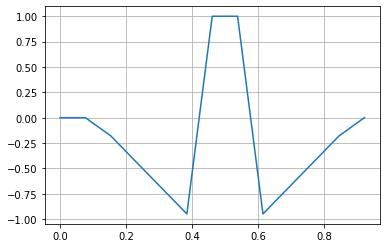

In [11]:
show_plot(wk, B_saved)

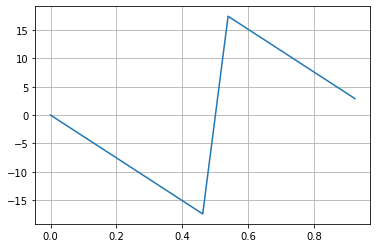

In [12]:
show_plot(wk, fi_saved)

# Частостная характеристика

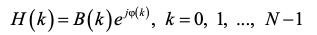

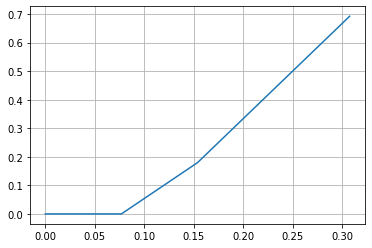

[0.0, 0.0, 0.17948717948717946, 0.43589743589743585, 0.6923076923076924, 0.9487179487179486]


In [13]:
H = []
for k in range(int(n/2)):
    H.append(abs(B_saved[k] * cm.exp(fi_saved[k] * 1j)))
show_plot(wk[range(len(H) - 1)], H[0:len(H) - 1])
print(H)

# Импульсная характеристика

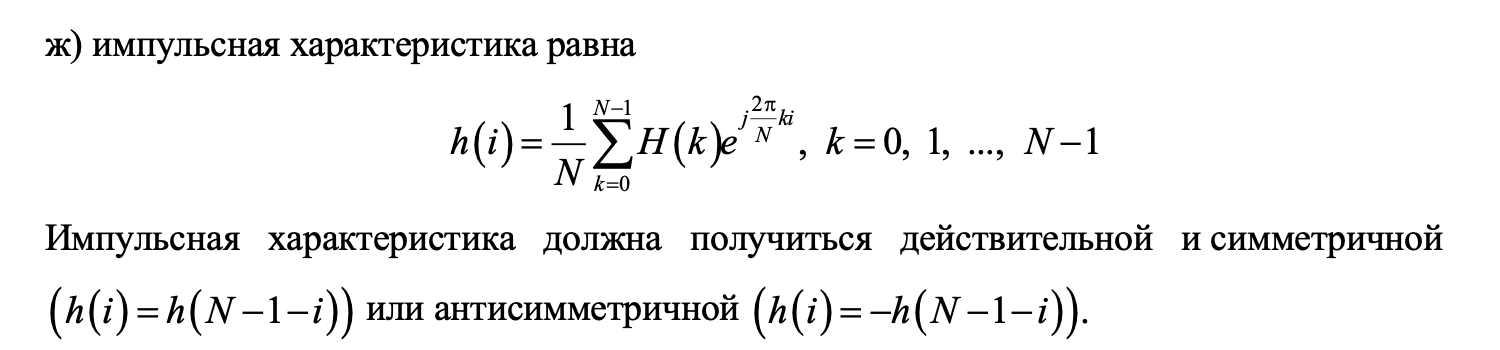

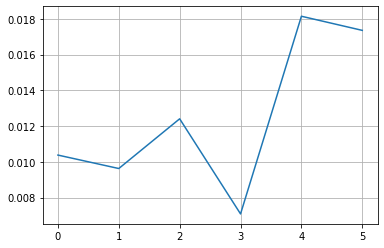

In [14]:
h = []
h_tmp = 0
for i in range(int(n/2)):
    for k in range(int(n/2)):
        h_tmp += H[k] * cm.exp((2* np.pi * k * i / n) * 1j)
    h.append(abs(h_tmp))
h /= 10*n
h = h[::-1]
show_plot(range(len(h)),h)

In [15]:
find_A(h, 50)

4.711977037052625e-05

# РРФ

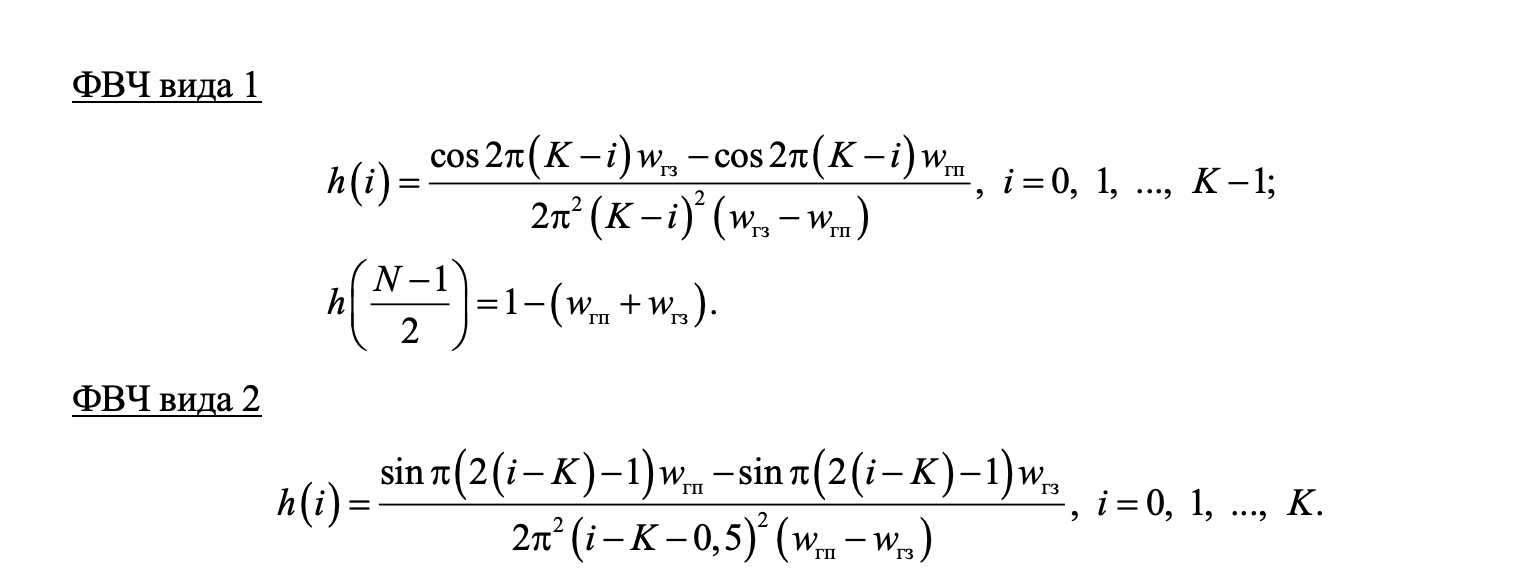

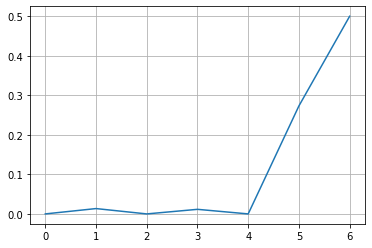

In [16]:
h = []
K = int((n - 1) / 2)
for i in range(K):
    h_c = np.cos(2*np.pi*(K - i)*wgz1) - np.cos(2*np.pi*(K - i)*wgp1)
    h_z = 2 * np.pi * np.pi * (K - i) * (K - i) * (wgz1 - wgp1) 
    h_tmp = h_c / h_z
    h.append(abs(h_tmp))
h.append(1 - wgp1 - wgz1)
show_plot(range(len(h)),h)

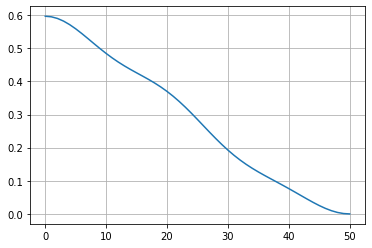

In [40]:
show_plot([x for x in range(51)], find_A(h))

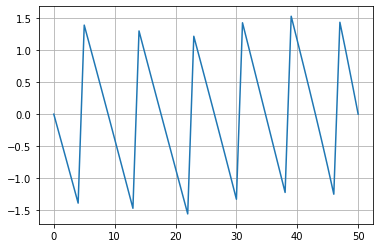

In [41]:
show_plot([x for x in range(51)], find_fi(h))